## Problem Statement

About Company
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

Problem
Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Data
Variable

Description

Loan_ID

Unique Loan ID

Gender

Male/ Female

Married

Applicant married (Y/N)

Dependents

Number of dependents

Education

Applicant Education (Graduate/ Under Graduate)

Self_Employed

Self employed (Y/N)

ApplicantIncome

Applicant income

CoapplicantIncome

Coapplicant income

LoanAmount

Loan amount in thousands

Loan_Amount_Term

Term of loan in months

Credit_History

credit history meets guidelines

Property_Area

Urban/ Semi Urban/ Rural

Loan_Status

Loan approved (Y/N)

 

Note: 

Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
You are expected to upload the solution in the format of "sample_submission.csv"

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


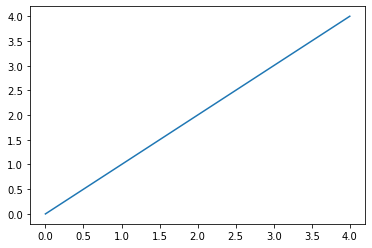

In [3]:
plt.plot(np.arange(5))

In [4]:
#Reading training data set
df= pd.read_csv("/home/tanvi/Documents/Machine_Learning/practice_notebooks/AnalyticsVidhya/Loan Prediction III/train_ctrUa4K.csv")

In [10]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
#Get summary of numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

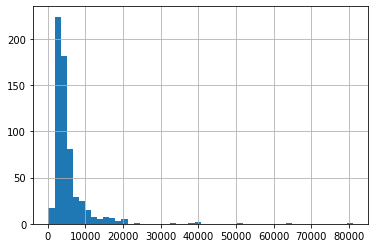

In [7]:
df['ApplicantIncome'].hist(bins=50)

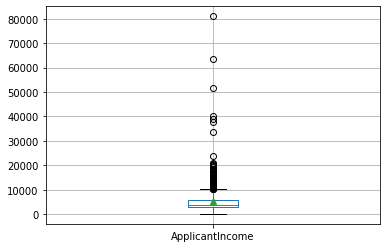

In [13]:
df.boxplot(column='ApplicantIncome', showmeans= True)

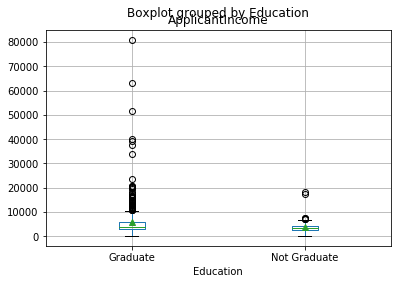

In [12]:
df.boxplot(column='ApplicantIncome', by= 'Education', showmeans= True)

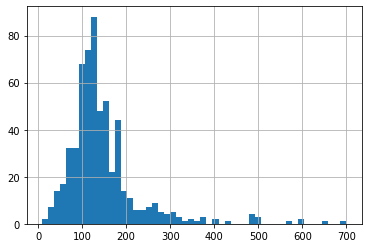

In [15]:
df['LoanAmount'].hist(bins=50)

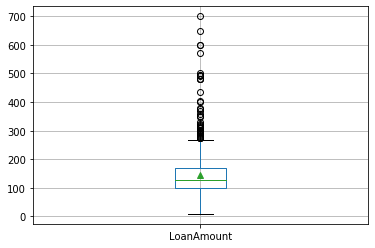

In [16]:
df.boxplot(column='LoanAmount', showmeans= True)

In [36]:
print('Frequency Table for Credit History')
temp1 = df['Credit_History'].value_counts(ascending= True)
temp1

Frequency Table for Credit History


0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [37]:
#Pivot table 
print('Probility of getting loan for each Credit History class:')
temp2= df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp2
#pd.pivot_table(df, index=['Credit_History'], values='Loan_Status', aggfunc= lambda x : x.map({'Y':1, 'N':0}).mean())

Probility of getting loan for each Credit History class:


,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5, 1.0, 'Probability of getting loan by credit history')

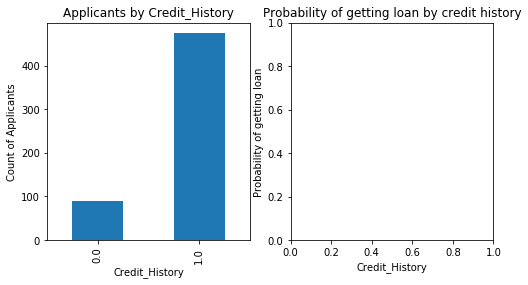

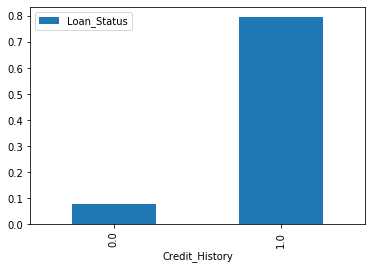

In [54]:
fig = plt.figure(figsize=(8,4)) 
ax1 = fig.add_subplot(121) 
ax1.set_xlabel('Credit_History') 
ax1.set_ylabel('Count of Applicants') 
ax1.set_title("Applicants by Credit_History") 
temp1.plot(kind='bar')

ax2 = fig.add_subplot(122)
temp2.plot(kind = 'bar') 
ax2.set_xlabel('Credit_History') 
ax2.set_ylabel('Probability of getting loan') 
ax2.set_title("Probability of getting loan by credit history")


In [35]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


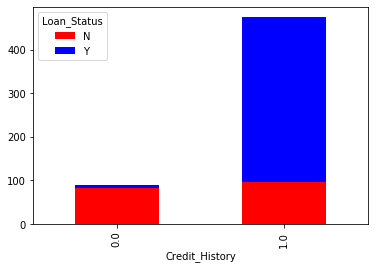

In [64]:
temp3.plot(kind='bar', stacked = True, color=['red','blue'], grid= False)

In [74]:
temp4 = pd.crosstab(index=[df['Credit_History'],df['Gender']], columns=df['Loan_Status'])
temp4

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

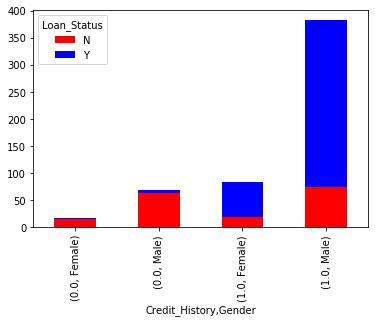

In [76]:
temp4.plot(kind='bar', stacked= True, color=['red', 'blue'])

In [77]:
print('Probility of getting loan for each Credit History and Gender class:')
temp5= df.pivot_table(values='Loan_Status',index=['Credit_History', 'Gender'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
temp5

Probility of getting loan for each Credit History and Gender class:


Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665

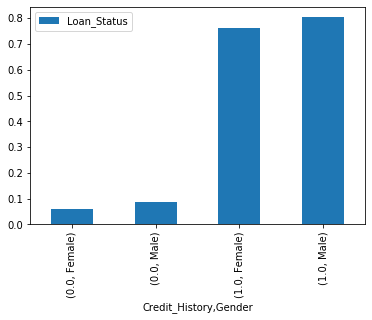

In [79]:
temp5.plot(kind='bar')

In [7]:
#Reading test data set
test_df= pd.read_csv("/home/tanvi/Documents/Machine_Learning/practice_notebooks/AnalyticsVidhya/Loan Prediction III/test_lAUu6dG(copy).csv")

In [4]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
# classification prediction based on Credit_History and Gender
def calculate_loan_status(credit_history, gender):
    if (credit_history == 1):
        return 'Y'
    else:
        return 'N'
    
# print(calculate_loan_status(0.0, 'Female'))
# print(calculate_loan_status(1.0, 'Female'))
test_df['Loan_Status']= list(map(calculate_loan_status, test_df['Credit_History'], test_df['Gender']))
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,N
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y


In [23]:
solution_df=test_df[['Loan_ID','Loan_Status']]
solution_df.to_csv('tanvi_101_submission_simple_classification_credit_history_gender.csv',index=False)